In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


In [2]:
# import data from file
road = pd.read_csv('data/demo-4.csv')

In [3]:
road.head()

,road,id,model_type,condition,name,lat,lon,length
0,N1,1000000,sourcesink,NaN,SoSi1,0,0,4
1,N1,1000001,link,NaN,NaN,1,1,1800
2,N1,1000002,bridge,A,NaN,2,2,200
3,N1,1000003,link,NaN,NaN,3,3,1500
4,N1,1000004,bridge,A,NaN,4,4,8


In [4]:
def find_shortest_path_from_sourcesink(df):
    """
    Finds and visualizes the shortest path between two randomly selected 'sourcesink' nodes in a given road network.
 
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.loc[i, 'road'] == df.loc[i + 1, 'road']:  # Ensure edges are within the same road
            G.add_edge(df.loc[i, 'id'], df.loc[i + 1, 'id'], weight=df.loc[i, 'length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # Filter for nodes where 'model_type' is 'sourcesink'
    sourcesink_nodes = df[df['model_type'] == 'sourcesink']['id'].tolist()

    # Randomly select two distinct sourcesink nodes
    if len(sourcesink_nodes) >= 2:
        source, sink = random.sample(sourcesink_nodes, 2)  # Pick two distinct nodes
    else:
        print("Not enough 'sourcesink' nodes available for shortest path calculation.")
        return

    # Compute the shortest path using road length as weight
    shortest_path = nx.shortest_path(G, source, sink, weight='weight')

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='orange', edge_color='gray', node_size=500, font_size=8)

    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))  # Convert path nodes into edges
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Show edge labels (road segment lengths)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Display the graph
    plt.title(f"Shortest Path from {source} to {sink}")
    plt.show()

    # Print the shortest path
    print(f"Shortest path from {source} to {sink}: {shortest_path}")




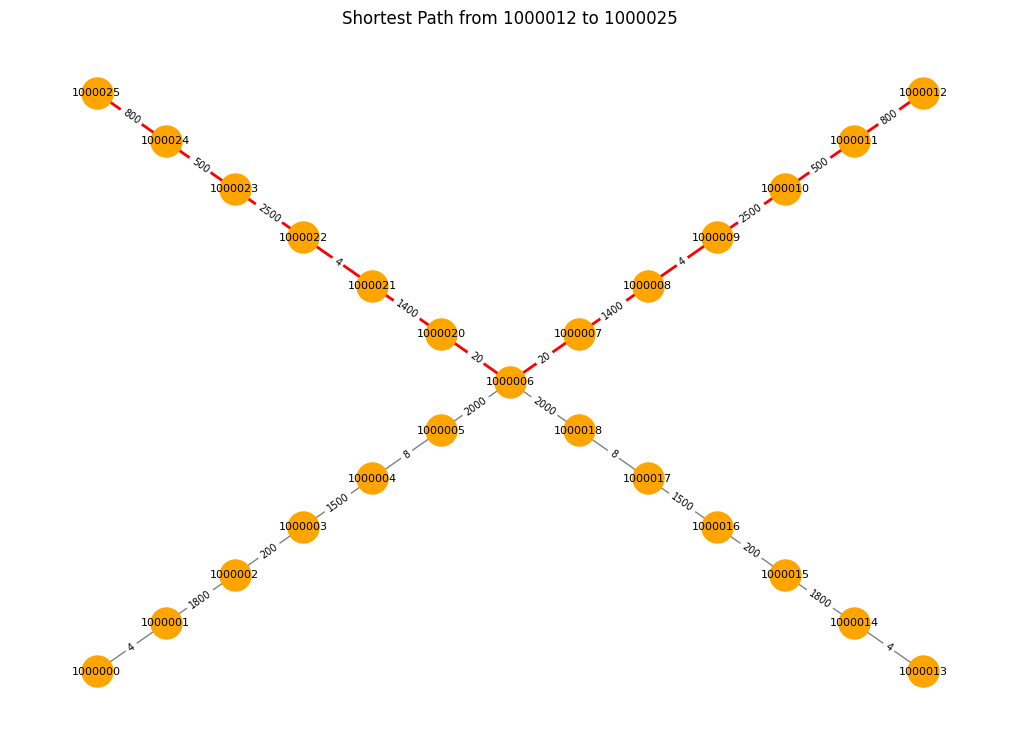

Shortest path from 1000012 to 1000025: [1000012, np.int64(1000011), np.int64(1000010), np.int64(1000009), np.int64(1000008), np.int64(1000007), np.int64(1000006), np.int64(1000020), np.int64(1000021), np.int64(1000022), np.int64(1000023), np.int64(1000024), 1000025]


In [5]:
find_shortest_path_from_sourcesink(road)